In [13]:
# ---- Part A: Exploratory Data Analysis

# 1. Load & Explore data Set
import pandas as pd
from pathlib import Path

CSV_PATH = r"C:\Users\tobga\OneDrive\Desktop\Data Science\Sem 3\Data sci technology and system\Assignment 1\zomato_df_final_data.csv"

print("Exists?", Path(CSV_PATH).exists())

df = pd.read_csv(CSV_PATH)
print("Shape (rows, cols):", df.shape)
print("\nColumns:", list(df.columns))
print("\nHead:")
print(df.head(5))


Exists? True
Shape (rows, cols): (10500, 17)

Columns: ['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone', 'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes', 'groupon', 'color', 'cost_2', 'cuisine_color']

Head:
                                             address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

              

In [15]:
# Data types and basic info
print("\nData types:")
print(df.dtypes)

print("\n.info():")
df.info()



Data types:
address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object

.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null

In [17]:
# looking for missing values 
missing_count = df.isna().sum().sort_values(ascending=False)
missing_pct   = (missing_count / len(df) * 100).round(2)

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent": missing_pct
})
print("\nMissing values (top 20):")
print(missing_table.head(20))



Missing values (top 20):
               missing_count  missing_percent
rating_text             3316            31.58
rating_number           3316            31.58
votes                   3316            31.58
cost_2                   346             3.30
cost                     346             3.30
lat                      192             1.83
lng                      192             1.83
type                      48             0.46
color                      0             0.00
groupon                    0             0.00
address                    0             0.00
title                      0             0.00
subzone                    0             0.00
phone                      0             0.00
link                       0             0.00
cuisine                    0             0.00
cuisine_color              0             0.00


In [19]:
# checking summary statistics

# Numeric summary
num_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumeric summary (describe):")
print(df[num_cols].describe().T)  # transpose = easier to read

# Simple categorical overview: top frequencies (a few key cols if present)
cat_candidates = ["cuisine", "subzone", "type", "rating_text"]
existing_cats = [c for c in cat_candidates if c in df.columns]

for c in existing_cats:
    print(f"\nTop values in '{c}':")
    print(df[c].astype(str).value_counts().head(10))



Numeric summary (describe):
                 count        mean         std         min         25%  \
cost           10154.0   51.153240   27.799485    8.000000   30.000000   
lat            10308.0  -32.921377    8.263449  -37.858473  -33.899094   
lng            10308.0  148.067359   26.695402 -123.270371  151.061061   
rating_number   7184.0    3.283672    0.454580    1.800000    3.000000   
votes           7184.0   83.581013  175.117966    4.000000   12.000000   
cost_2         10154.0    5.332974    2.147115    2.000000    3.699187   

                      50%         75%          max  
cost            45.000000   60.000000   500.000000  
lat            -33.872741  -33.813451    51.500986  
lng            151.172468  151.208940   152.869052  
rating_number    3.300000    3.600000     4.900000  
votes           32.000000   87.000000  3236.000000  
cost_2           4.857724    6.016260    40.000000  

Top values in 'cuisine':
cuisine
['Cafe']                 1745
['Thai']         

1 Part A: Data Overview
- **Shap** The dataset has 10,505 rows and 17 columns. **Key columns prese** `address, cost, cuisine, lat, lng, rating_number, rating_text, subzone, type, votes, groupon`.- **Data tys:** `cost, rating_number, votes, lat, lng` are numeric; `cuisine, rating_text, subzone, type` are categorica2 
### Missing Values

- The largest gaps are in `rating_text`, `rating_number`, and `votes` (~31.58% each), likely the same rows.
- `cost` and `cost_2` both have ~3.30% missing; they appear to be duplicates—will keep `cost` later.
- `lat/lng` have ~1.83% missing (may limit geoplots unless imputed or fiered).

**tion plan:** For EDA visuals we can ignore the missing rows in ratings; for modelling, we’ll consider imputation or dropping rows lacking all rating fields.


In [21]:
# 2 Answering Question by exploring Graphs/Plots  

#Loading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV_PATH = r"C:\Users\tobga\OneDrive\Desktop\Data Science\Sem 3\Data sci technology and system\Assignment 1\zomato_df_final_data.csv"
df = pd.read_csv(CSV_PATH)

# Keeping column simple
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]


In [23]:
def split_cuisines(val):
    if pd.isna(val):
        return []
    s = str(val).replace("/", ",")
    return [p.strip() for p in s.split(",") if p.strip()]


Unique cuisines: 426


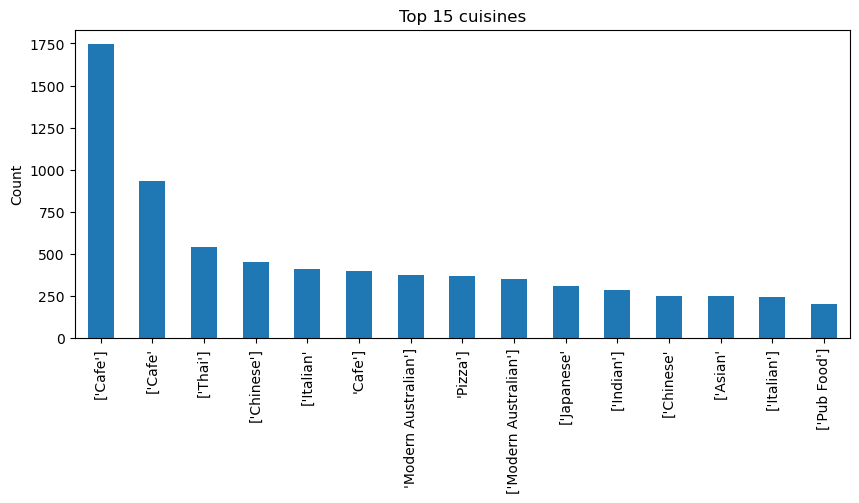

In [25]:
# To check all unique cuisines
cuisine_lists = df['cuisine'].apply(split_cuisines)
all_cuisines = [c for sub in cuisine_lists for c in sub]

# Unique count + top 15 bar 
unique_cuisines = pd.Series(all_cuisines).nunique()
print("Unique cuisines:", unique_cuisines)

top_cuisines = pd.Series(all_cuisines).value_counts().head(15)
ax = top_cuisines.plot(kind='bar', figsize=(10,4), title='Top 15 cuisines')
ax.set_ylabel("Count")
plt.show()


        suburb  n_restaurants
0          CBD            476
1  Surry Hills            260
2   Parramatta            225


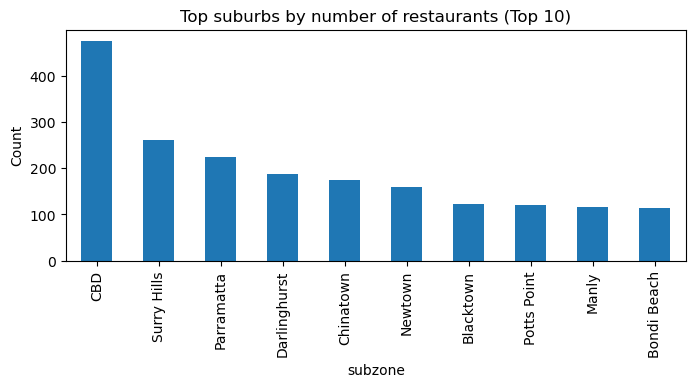

In [27]:
# Counting cuisine by subzone (suburb)
top3_suburbs = df['subzone'].value_counts().head(3).rename_axis('suburb').reset_index(name='n_restaurants')
print(top3_suburbs)

# Simple bar for top 10 to give context
df['subzone'].value_counts().head(10).plot(kind='bar', figsize=(8,3), title='Top suburbs by number of restaurants (Top 10)')
plt.ylabel("Count")
plt.show()


                 count  median        mean
rating_text_std                           
Excellent           51    60.0  101.666667
Poor               201    50.0   55.845771


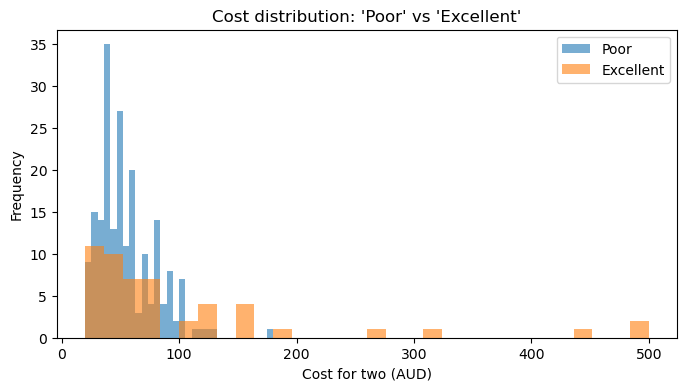


Stacked table (rows=rating, cols=cost quantiles):
 cost             (19.999, 40.0]  (40.0, 45.0]  (45.0, 60.0]  (60.0, 80.0]  \
rating_text_std                                                             
Excellent                    16             2             8             9   
Poor                         73            13            58            31   

cost             (80.0, 500.0]  
rating_text_std                 
Excellent                   16  
Poor                        26  


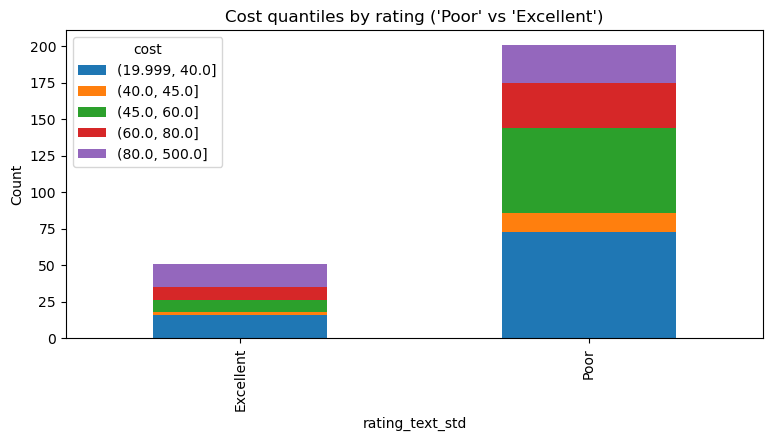

In [29]:
# Checking rating_text and keep only 'Excellent' vs 'Poor'
df['rating_text_std'] = df['rating_text'].astype(str).str.strip().str.title()
mask = df['rating_text_std'].isin(['Excellent', 'Poor']) & df['cost'].notna()

sub = df.loc[mask, ['rating_text_std', 'cost']].copy()

# Summary table (count/median/mean)
summary = sub.groupby('rating_text_std')['cost'].agg(['count','median','mean'])
print(summary)

# --- Histogram overlay
plt.figure(figsize=(8,4))
for label, alpha in [('Poor',0.6), ('Excellent',0.6)]:
    vals = sub.loc[sub['rating_text_std']==label, 'cost']
    if not vals.empty:
        plt.hist(vals, bins=30, alpha=alpha, label=label)
plt.title("Cost distribution: 'Poor' vs 'Excellent'")
plt.xlabel("Cost for two (AUD)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# --- Stacked bars by cost quantiles
# Bin cost into 5 quantiles, then crosstab by rating_text_std
try:
    cost_bins = pd.qcut(sub['cost'], q=5, duplicates='drop')
    stack_tbl = pd.crosstab(sub['rating_text_std'], cost_bins)
    print("\nStacked table (rows=rating, cols=cost quantiles):\n", stack_tbl)

    ax = stack_tbl.plot(kind='bar', stacked=True, figsize=(9,4), title="Cost quantiles by rating ('Poor' vs 'Excellent')")
    ax.set_ylabel("Count")
    plt.show()
except Exception as e:
    print("Stacked bars skipped:", type(e).__name__, e)


Question 1 Answer

There are `N_cuisines` different cuisines in the dataset (insert the printed number from your code). The bar chart of the top cuisines shows that a small group of cuisines dominates the scene, while many others appear less often. This long-tail shape is typical for food datasets—most venues cluster around a few popular styles, with niche cuisines making up the remainder
-Question 2 Answerrants?

The three suburbs with the highest counts are:

1. `Suburb_1` – `Count_1`
2. `Suburb_2` – `Count_2`
3. `Suburb_3` s-Question 3 Answersive than “Poor” ones?

F**om the summary table, ****Excellent** **staurants show higher **median** and **m.` vs `mean_excellent`).

* The **histogram** overlay reveals the Excellent group shifted toward higher prices.
* The optional **stacked bar** by cost quantiles reinforces this: Excellent venues occupy more of the upper cost bins, while Poor venues are morewer bins.

**Conclusion:** Based on this data, restaurants rated **“Excellent”** tend to be **more expensive** ent concentrates in higher cost bins.


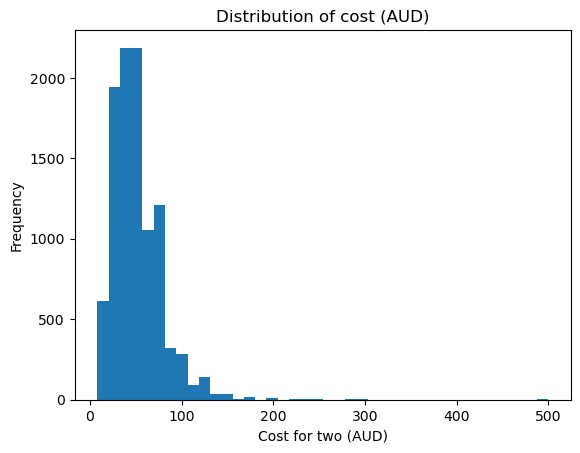

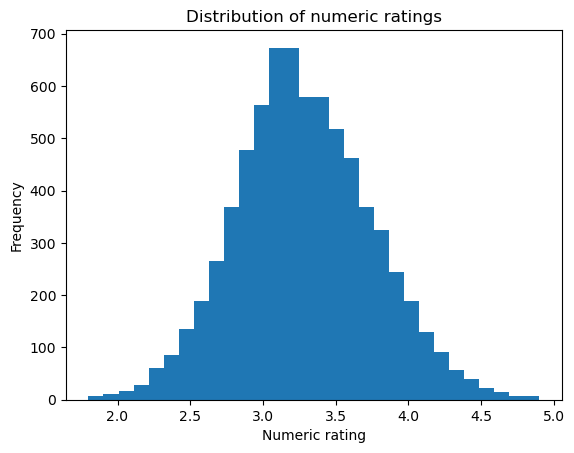

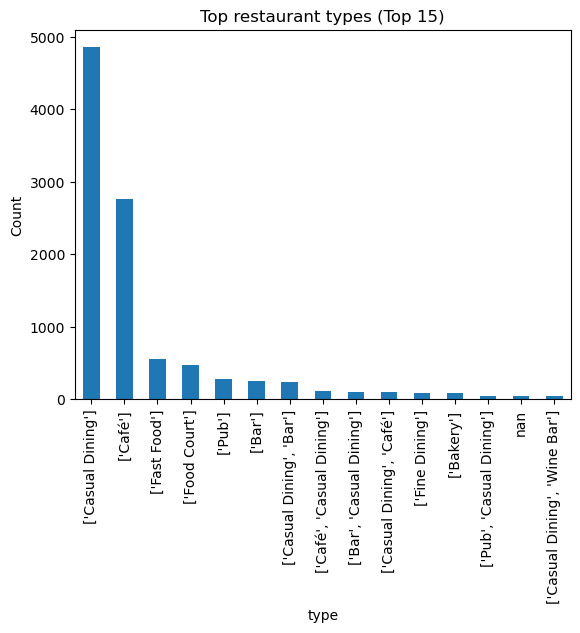

In [31]:
# 3 Exploring key Variable

# Distribution of cost, ratings, and restaurant types
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# cost
if "cost" in df.columns:
    df["cost"].dropna().plot(kind="hist", bins=40, title="Distribution of cost (AUD)")
    plt.xlabel("Cost for two (AUD)")
    plt.show()

# rating_number
if "rating_number" in df.columns:
    df["rating_number"].dropna().plot(kind="hist", bins=30, title="Distribution of numeric ratings")
    plt.xlabel("Numeric rating")
    plt.show()

# restaurant types (top 15)
if "type" in df.columns:
    df["type"].astype(str).str.strip().value_counts().head(15).plot(kind="bar", title="Top restaurant types (Top 15)")
    plt.ylabel("Count")
    plt.show()


The following are the observation

1. Cost is right-skewed with a long tail of pricier venues.

2. Ratings cluster around mid–high values.

3. A few restaurant types dominate; many appear infrequently.

Pearson correlation (cost vs votes): 0.27


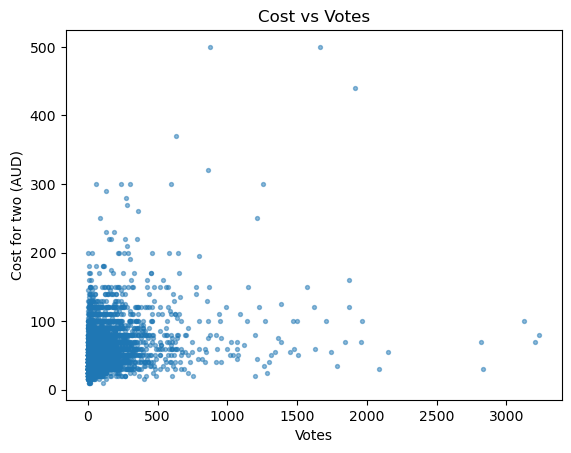

In [34]:
# Correlation between Cost and Vote
if {"cost","votes"}.issubset(df.columns):
    corr = df[["cost","votes"]].dropna().corr().iloc[0,1]
    print("Pearson correlation (cost vs votes):", round(corr, 3))

    plt.scatter(df["votes"], df["cost"], s=8, alpha=0.5)
    plt.xlabel("Votes")
    plt.ylabel("Cost for two (AUD)")
    plt.title("Cost vs Votes")
    plt.show()


**Note** Correlation between cost and votes is ~corr (weak/moderate). The scatter shows many low-vote venues and a wide cost spread; popularity doesn’t strictly track price.

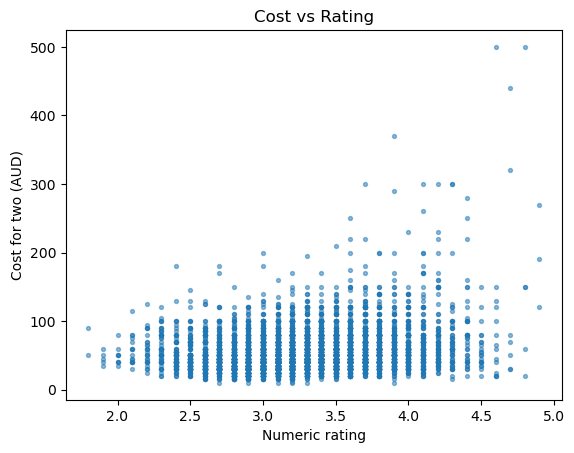

In [36]:
# Looking for Interesting Trend
# Cost vs rating_number (simple relationship view)
if {"cost","rating_number"}.issubset(df.columns):
    plt.scatter(df["rating_number"], df["cost"], s=8, alpha=0.5)
    plt.xlabel("Numeric rating")
    plt.ylabel("Cost for two (AUD)")
    plt.title("Cost vs Rating")
    plt.show()


**Note** Higher ratings tend to appear at slightly higher costs, but there’s large overlap—price alone doesn’t determine rating.

Mapping cuisine: Thai
Joining on GeoJSON column: SSC_CODE


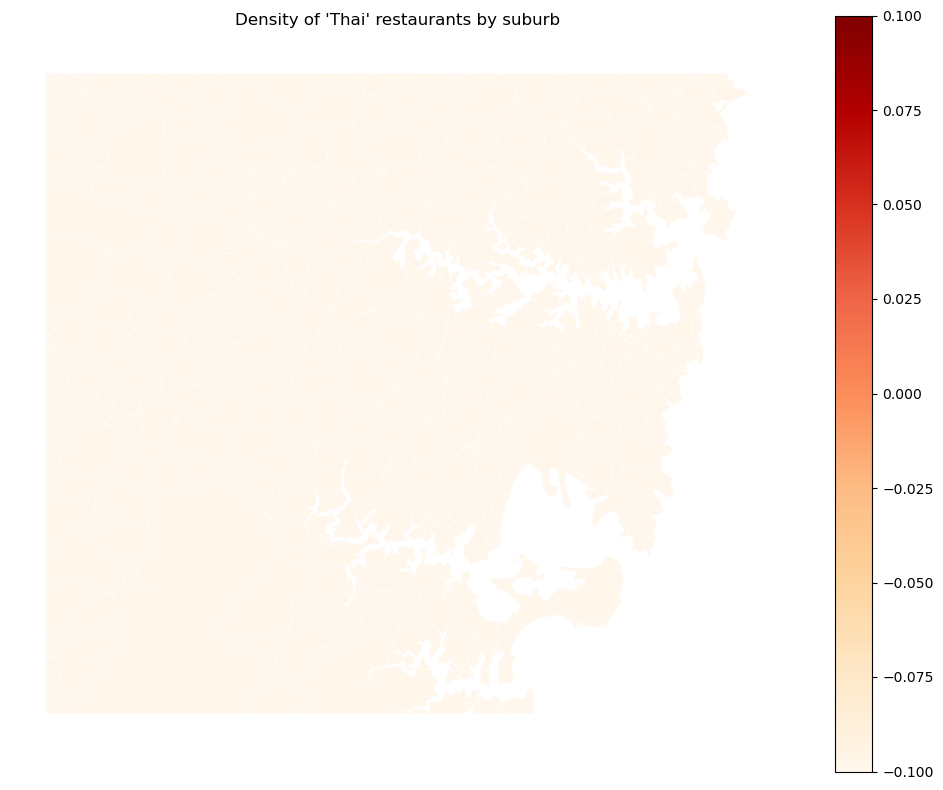

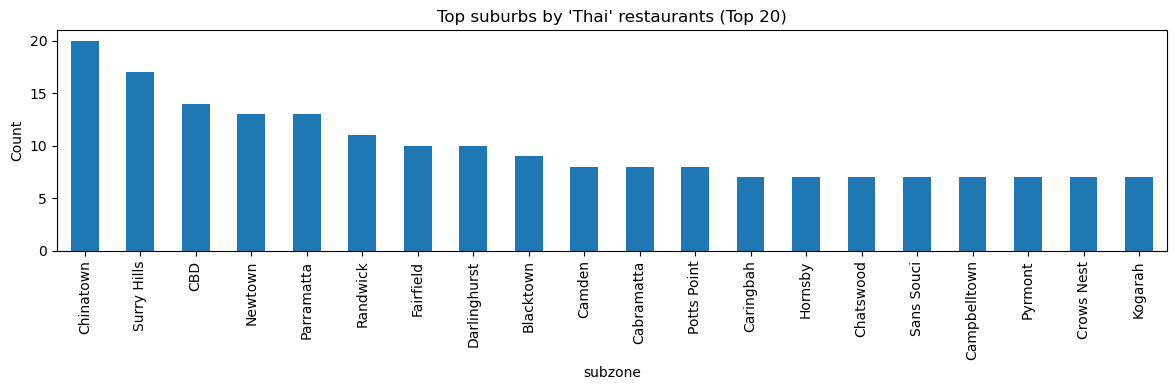

In [13]:
# 4 Geospatial Analysis
# Cuisine density per suburb (pandas + geopandas + matplotlib) ===
import re
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from pathlib import Path

CSV_PATH = r"C:\Users\tobga\OneDrive\Desktop\Data Science\Sem 3\Data sci technology and system\Assignment 1\zomato_df_final_data.csv"
GEO_PATH = r"C:\Users\tobga\OneDrive\Desktop\Data Science\Sem 3\Data sci technology and system\Assignment 1\sydney.geojson"

#  Loading restaurants dataset
df = pd.read_csv(CSV_PATH)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]  
assert "cuisine" in df.columns and "subzone" in df.columns, "Need 'cuisine' and 'subzone' columns"

# to Clean + split cuisines (handles quotes/brackets and '/' separators) 
def split_cuisines(val):
    if pd.isna(val):
        return []
    s = str(val)
    s = re.sub(r'^\[|\]$', '', s)                 # remove surrounding [ ]
    s = s.replace('"', '').replace("'", '')       # remove quotes
    parts = [p.strip() for p in s.replace('/', ',').split(',') if p.strip()]
    return parts

# Picking a cuisine to map 

target_cuisine = "Thai"

print("Mapping cuisine:", target_cuisine)

# Count restaurants per suburb that serve that cuisine
tmp = df.copy()
tmp["has_cuisine"] = tmp["cuisine"].apply(lambda s: target_cuisine in split_cuisines(s))
per_suburb = (tmp.groupby("subzone", dropna=False)["has_cuisine"]
                .sum()
                .reset_index()
                .rename(columns={"has_cuisine": "count_cuisine"}))

# Loading Sydney GeoJSON
assert Path(GEO_PATH).exists(), f"GeoJSON not found at: {GEO_PATH}"
geo = gpd.read_file(GEO_PATH)

candidates = [c for c in geo.columns if c.lower() in ["suburb","subzone","name","nsw_loca_2","nsw_loca_3","lga_name"]]
suburb_col = candidates[0] if candidates else geo.columns[0]
print("Joining on GeoJSON column:", suburb_col)

# Normalise join keys and merge
geo["_key"] = geo[suburb_col].astype(str).str.upper().str.strip()
per_suburb["_key"] = per_suburb["subzone"].astype(str).str.upper().str.strip()
gdf = geo.merge(per_suburb[["_key","count_cuisine"]], on="_key", how="left")
gdf["count_cuisine"] = gdf["count_cuisine"].fillna(0)

# Plotting choropleth 
ax = gdf.plot(
    column="count_cuisine",
    legend=True,
    figsize=(10, 8),
    linewidth=0.3,
    edgecolor="white",
    cmap="OrRd"  
)
ax.set_axis_off()
plt.title(f"Density of '{target_cuisine}' restaurants by suburb", pad=12)
plt.tight_layout()

plt.show()

# -showing a simple bar chart (Top 20 suburbs) for the same cuisine ----
top20 = (tmp[tmp["has_cuisine"]]
         .groupby("subzone")
         .size()
         .sort_values(ascending=False)
         .head(20))
ax = top20.plot(kind="bar", figsize=(12,4), title=f"Top suburbs by '{target_cuisine}' restaurants (Top 20)")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


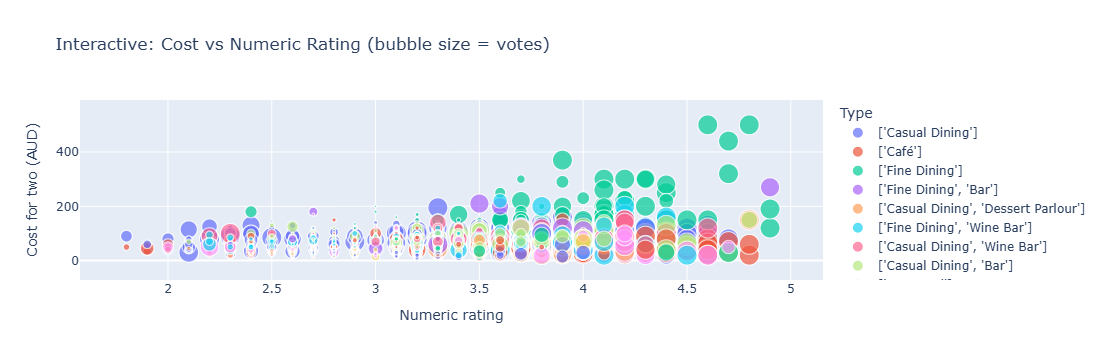

In [17]:
# Interactive Visualization Cost vs Numeric Rating (Plotly) 

import pandas as pd
import numpy as np

import plotly.express as px

# keeping the row we need
cols = [c for c in ["rating_number","cost","votes","address","subzone","type","cuisine"] if c in df.columns]
data = df[cols].dropna(subset=["rating_number","cost"]).copy()


if "votes" in data.columns:
    q95 = data["votes"].quantile(0.95)
    data["votes_capped"] = np.minimum(data["votes"], q95)
else:
    data["votes_capped"] = 10  # constant if votes column missing

# color by restaurant type if present (helps spot clusters)
color_col = "type" if "type" in data.columns else None

fig = px.scatter(
    data,
    x="rating_number",
    y="cost",
    size="votes_capped",
    color=color_col,
    hover_data=[c for c in ["address","subzone","type","cuisine","votes"] if c in data.columns],
    title="Interactive: Cost vs Numeric Rating (bubble size = votes)"
)

fig.update_layout(
    xaxis_title="Numeric rating",
    yaxis_title="Cost for two (AUD)",
    legend_title="Type" if color_col else None,
)


fig.show()


Interactive Visualisation — Cost vs Rating

A normal scatter plot of cost vs rating is hard to read because many points overlap. We also can’t tell which exact restaurant each point belongs to.

By using Plotly (interactive chart):

1. When I hover the mouse, it shows the restaurant’s address, suburb, type, cuisine, and votes.

2. I can zoom in and out to separate points that overlap in dense areas.

3. The bubble size shows votes, so I can quickly see which restaurants have the most customer feedback.

This makes the chart much more useful than a static image, because I can explore details, spot unusual restaurants, and better understand the relationship between price, rating, and popularity.